## W.3 Wrangle Provider_Specialty_Codes

### Table of Contents

1. <a href="#1.-Observations-&-Goals">Observations & Goals</a>
2. <a href="#2.-Python-Libraries-&-Tools">Python Libraries & Tools</a>
3. <a href="#3.-Notebook-Settings">Notebook Settings</a>
4. <a href="#4.-Data-Source">Data Source</a>
5. <a href="#5.-Create-DataFrame-from-Prov_Specialty_Desc">Create DataFrame from Prov_Specialty_Desc</a>
6. <a href="#6.-Export-DataFrame-to-Excel-and-Map-Descriptions-to-Category">Export DataFrame to Excel and Map Descriptions to Category</a>
7. <a href="#7.-Assign-Prov_Specialty_Desc-to-Category">Assign Prov_Specialty_Desc to Category</a>
8. <a href="#8.-Assign-Prov_Specialty_Desc-to-new-Code_Num">Assign Prov_Specialty_Desc to new Code_Num</a>
9. <a href="#9.-Import-Excel-Tables-from-Step-#6-and-#7">Import Excel Tables from Step #6 and #7</a>
10. <a href="#10.-Create-Dictionary-and-Replace-Prov_Specialty_Desc">Create Dictionary and Replace Prov_Specialty_Desc</a>
11. <a href="#11.-Create-Dictionary-for-Prov_Spec_Code_Num">Create Dictionary for Prov_Specialty_Code_Num</a>
12. <a href="#12.-Replace-Prov_Specialty_Code">Replace Prov_Specialty_Code</a>
13. <a href="#13.-Dropped-Columns">Dropped Columns</a>
14. <a href="#14.-Analytics">Analytics</a>

### 1. Observations & Goals

Observation:  There are 170 Provider Specialty Codes.  The Codes and Descriptions are governed by the Center for Medicare and Medicaid Services Center (CMS).
    
Goal: Reduce the number of Codes by creating 'Category' field based on keywords in Specialty Codes.

### 2. Python Libraries & Tools

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

from IPython import display

from pivottablejs import pivot_ui
import ipypivot as pt

import os as os

# pd.read_clipboard()



[<a href='#Table-of-Contents'>Table of Contents</a>]

### 3. Notebook Settings

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.0f}'.format
plt.rcParams.update(plt.rcParamsDefault)


import winsound
duration = 1300
freq = 440

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 4. Data Source

In [3]:
df = pd.read_pickle('DataFiles/AnnualpickleMay12')

winsound.Beep(freq,duration)

[<a href='#Table-of-Contents'>Table of Contents</a>]


### 5. Create DataFrame from Prov_Specialty_Desc


In [7]:
# # PURPOSE: Reduce the number of descriptions by grouping into Category's.
# # Run value_counts function to_frame.

df_Description = df.Prov_Specialty_Desc.value_counts()\
                .to_frame()\
                .reset_index()\
                .set_index(['Prov_Desc_Split_Col'])\
                .rename(columns={'index':'Unique_Descriptions'})

df_Description.index.name = "Value_Counts"



[<a href='#Table-of-Contents'>Table of Contents</a>]


### 6. Export DataFrame to Excel and Map Descriptions to Category

In [ ]:
# PURPOSE: Use Excel to split descriptions and categorize descriptions.

df_Description.to_excel('DataFiles\ProvSpecialtDescCount.xlsx',
                        sheet_name='UniqueCategory',index=True)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 7. Assign Prov_Specialty_Desc to Category


In [ ]:
# PURPOSE: This task was performed in Excel.  See Step 8 which shows the 
# output in Excel "Sheet1"


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 8. Assign Prov_Specialty_Desc to new Code_Num


In [ ]:
# PURPOSE: This task was performed in Excel.  See Step 8 which shows the 
# output in Excel "Sheet2"

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 9. Import Excel Tables from Step #6 and #7

In [ ]:
# PURPOSE:  Import Excel Tables to create dictionary for new "Category" 
# and new "Cotegory_Number"
    
    
xls = pd.ExcelFile('DataFiles\Prov_Spec_Desc_Map.xlsx')
Excel_Desc_Dict_Map1 = pd.read_excel(xls, 'Sheet1')
Excel_Desc_Dict_Map2 = pd.read_excel(xls, 'Sheet2')

Excel_Desc_Dict_Map1.head()
Excel_Desc_Dict_Map2.head()


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 10. Create Dictionary and Replace Prov_Specialty_Desc

In [ ]:
# PURPOSE:  Create Dictionary to Replace new Prov_Specialty_Desc

dict_Specialty_Desc = Excel_Desc_Dict_Map1.set_index('Prov_Specialty_Desc')
    .to_dict()['Category']

df.replace({'Prov_Specialty_Desc':dict_Specialty_Desc},inplace=True)


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 11. Create Dictionary for Prov_Spec_Code_Num

In [ ]:
# PURPOSE: Create new Dictionary to map new Category to new "Prov_Spec_Code_Num" and 
# then apply to new column ('Prov_Spec_Code_Num')


dict_Specialty_Code_Num = Excel_Desc_Dict_Map2.set_index('Category')
    .to_dict()['Prov_Spec_Code_Num']

df['Prov_Spec_Code_Num'] = df['Prov_Specialty_Desc'].map(dict_Specialty_Code_Num)


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 12. Replace Prov_Specialty_Code

In [ ]:
# PURPOSE:  Use 1st for 4 characters of Prov_Specialty_Code description.

df['Prov_Specialty_Code'] = df['Prov_Specialty_Desc'].str[:4]


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 13. Dropped Columns

In [ ]:
# PURPOSE:  Disclose Columns no longer required.

df.drop(columns=['Prov_Facility'], inplace=True)
df.drop(columns=['Prov_Qual'],inplace=True)


[<a href='#Table-of-Contents'>Table of Contents</a>]

### 14. Analytics

In [4]:
dfp = df.loc[(df.Charge_Paid > 0)]
dfp.head()

,Mem_Acct,Mem_SubAcct,Mem_ID,Prov_ID,Prov_Specialty_Code,Prov_Specialty_Desc,Prov_Spec_Code_Num,Claim_ID,Claim_Line_Item,Claim_File_Date,Claim_POS,Claim_POS_Desc,Claim_Bill_Code,Claim_Bill_Desc,Claim_Bill_Proce,Claim_Bill_Proce_Desc,Claim_ICD1,Claim_ICD1.1,Claim_ICD_Desc,Charge,Charge_Allowed,Charge_CoPay,Charge_Deduct,Charge_CoIn,Charge_CMS,Charge_Other1,Charge_Other2,Charge_Other3,Charge_Paid,Charge_Trans,Charge_Trans_Date,Charge_Type,Pay_Period,Fiscal_Year
Index_Claim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,455716,1,455716-01,086941,PATH,PATHOLOGY,19,7842027,1,2019-06-05,23,Emergency Room – Hospital,,UB92 - REVENUE CODES,80048,BASIC METABOLIC PANEL,L02.411,12,Skin_Tissue,20,16,0,0,0,0,0,0,0,16,505921,2019-11-16,Payment,2,2020
32,455716,1,455716-01,086941,PATH,PATHOLOGY,19,7842027,2,2019-06-05,23,Emergency Room – Hospital,,UB92 - REVENUE CODES,85025,COMPLETE CBC W/AUTO DIFF WBC,L02.411,12,Skin_Tissue,20,16,0,0,0,0,0,0,0,16,505921,2019-11-16,Payment,2,2020
36,455716,1,455716-01,406859,GENE,GENERAL SURGERY,8,7895211,1,2019-06-07,22,On Campus-Outpatient Hospital,,UB92 - REVENUE CODES,99220,OBSERVATION CARE,L03.111,12,Skin_Tissue,1161,917,0,0,0,0,0,0,0,917,505934,2019-11-18,Payment,2,2020
37,455716,1,455716-01,406859,GENE,GENERAL SURGERY,8,7895211,2,2019-06-07,11,Office,999,OTHER PATIENT CONVENIENCE ITEM,99199,SPECIAL SERVICE/PROC/REPORT,L03.111,12,Skin_Tissue,0,0,0,0,0,0,0,0,0,8,505934,2019-11-18,Payment,2,2020
38,455716,1,455716-01,406859,GENE,GENERAL SURGERY,8,7895214,1,2019-06-08,22,On Campus-Outpatient Hospital,,UB92 - REVENUE CODES,99226,SUBSEQUENT OBSERVATION CARE,L03.111,12,Skin_Tissue,657,519,0,0,0,0,0,0,0,519,505934,2019-11-18,Payment,2,2020


In [5]:
dfp_psc = dfp.loc[:,['Prov_Specialty_Code', 'Prov_Specialty_Desc', 'Prov_Spec_Code_Num', 
                     'Charge', 'Charge_Allowed','Charge_CoPay', 'Charge_Deduct','Charge_Paid','Pay_Period']]



dfp_psc['Mem_OutofPocket'] = dfp_psc.Charge_CoPay + dfp_psc.Charge_Deduct

def describe(dfp_psc, stats):
    d = dfp_psc.describe()
    return d.append(dfp_psc.reindex(d.columns, axis = 1).agg(stats))

describe(dfp_psc, ['sum', 'median'])


,Prov_Spec_Code_Num,Charge,Charge_Allowed,Charge_CoPay,Charge_Deduct,Charge_Paid,Pay_Period,Mem_OutofPocket
count,"148,659","148,659","148,659","148,659","148,659","148,659","148,659","148,659"
mean,11,668,234,8,2,211,4,10
std,6,"5,054","1,676",61,64,"1,635",3,88
min,1,0,0,0,0,1,1,0
25%,7,48,16,0,0,14,2,0
50%,9,128,66,0,0,55,3,0
75%,14,246,133,0,0,114,6,0
max,26,"711,169","291,864","3,653","5,000","291,864",12,"5,000"
sum,"1,643,482","99,310,243","34,854,364","1,134,601","333,072","31,326,014","637,375","1,467,673"
median,9,128,66,0,0,55,3,0


In [175]:
# dfp.info()
PCode_max = dfp.Prov_Specialty_Code.value_counts().max()
PCode_maxs = '{:,.0f}'.format(PCode_max)
PCode_min = dfp.Prov_Specialty_Code.value_counts().min()
PCode_mins = '{:,.0f}'.format(PCode_min)
PCode_nuniq = dfp.Prov_Specialty_Code.nunique()
PCode_nuniqs = '{:,.0f}'.format(PCode_nuniq)
PCode_claims = dfp.Prov_Specialty_Code.count()
PCode_claimss = '{:,.0f}'.format(PCode_claims)
Mem_OutofPocket = dfp_psc.Mem_OutofPocket.sum()
Mem_OutofPockets = '${:,.0f}'.format(Mem_OutofPocket)
Annual_charge = dfp.Charge_Allowed.sum()
Annual_charges = '${:,.0f}'.format(Annual_charge)
Annual_paid = dfp.Charge_Paid.sum()
Annual_paids = '${:,.0f}'.format(Annual_paid)


f"1. There were {PCode_claimss} claims processed from {PCode_nuniqs} unique Providers."
f"2. By Provider the total claims ranged from {PCode_mins} to {PCode_maxs}."
f"3. The total amount allowed to be paid was {Annual_charges}."
f"4. The total amount member paid out of pocket was {Mem_OutofPockets}."
f"5. The total amount actually paid by company was {Annual_paids}."

'1. There were 148,659 claims processed from 24 unique Providers.'

'2. By Provider the total claims ranged from 647 to 50,108.'

'3. The total amount allowed to be paid was $34,854,364.'

'4. The total amount member paid out of pocket was $1,467,673.'

'5. The total amount actually paid by company was $31,326,014.'

In [176]:
quart = pd.cut(dfp_psc.Charge, 8)

def get_stats(group):
    return {'min':group.min(),'max': group.max(), 'count': group.count(), 'mean': group.mean()}

grouped = dfp_psc.Charge.groupby(quart)
grouped.apply(get_stats).unstack()

,min,max,count,mean
Charge,,,,
"(-711.169, 88896.125]",0,"86,835","148,602",595
"(88896.125, 177792.25]","94,195","173,021",33,"120,611"
"(177792.25, 266688.375]","191,416","250,268",17,"219,618"
"(266688.375, 355584.5]","278,541","320,923",2,"299,732"
"(355584.5, 444480.625]","374,356","442,218",2,"408,287"
"(444480.625, 533376.75]","477,720","477,720",1,"477,720"
"(533376.75, 622272.875]","558,208","558,208",1,"558,208"
"(622272.875, 711169.0]","711,169","711,169",1,"711,169"


In [177]:
pd.options.display.float_format = '{:,.2f}'.format
dfp_psc['Charge_Allowed'].quantile([0.05,0.25,0.5,0.75,0.95])\
    .to_frame().reset_index().rename(columns={'index':'Quantiles'})

,Quantiles,Charge_Allowed
0,0.05,4.00
1,0.25,16.00
2,0.50,66.00
3,0.75,133.00
4,0.95,700.00


In [91]:
pd.options.display.float_format = '{:,.0f}'.format

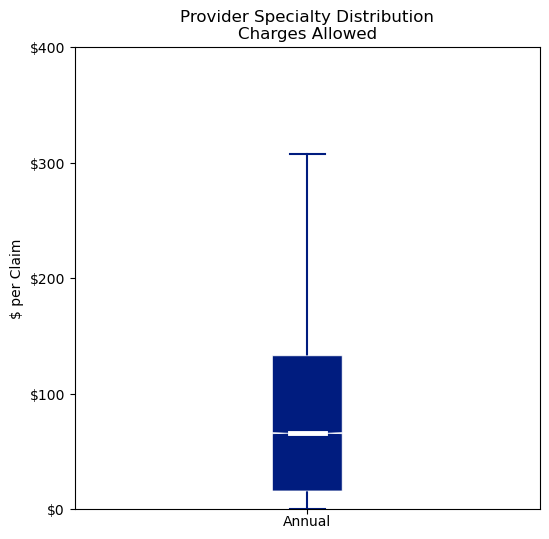

In [178]:
q_box = dfp_psc['Charge_Allowed']
plt.style.use('seaborn-dark-palette')

fig, ax = plt.subplots(figsize=(6,6))
ax.boxplot(q_box,
           positions=None,
           notch=True,
           patch_artist=True, 
           showfliers=False,
           medianprops={"color": "white", "linewidth": 3.5},
           boxprops={"facecolor": "C0", "edgecolor": "white", "linewidth": 0.5},
           whiskerprops={"color": "C0", "linewidth": 1.5},
           capprops={"color": "C0", "linewidth": 1.5})

ax.set(ylim=(1, 400), yticks=np.arange(0, 401,100))
ax.set_title('Provider Specialty Distribution\nCharges Allowed')
formatter = '${x:,.0f}'
plt.gca().yaxis.set_major_formatter(formatter)
ax.set_ylabel('$ per Claim')
ax.tick_params(labelbottom=False)
ax.set_xlabel('Annual')

plt.show();

In [256]:
fig1_data = dfp_psc.groupby('Prov_Specialty_Desc')['Charge_Allowed'].agg(['mean','count'])
fig1_data

,mean,count
Prov_Specialty_Desc,,
ALLERGY & IMMUN,101,1421
ANESTHESIOLOGY,358,1079
CARDIOLOGY,101,3115
DENTAL & VISION,151,4013
DERMATOLOGY,112,1658
GASTROENTEROLOGY,291,719
GENERAL MEDICINE,58,26134
GENERAL SURGERY,61,10497
HOSPITAL/CLINIC,470,50108


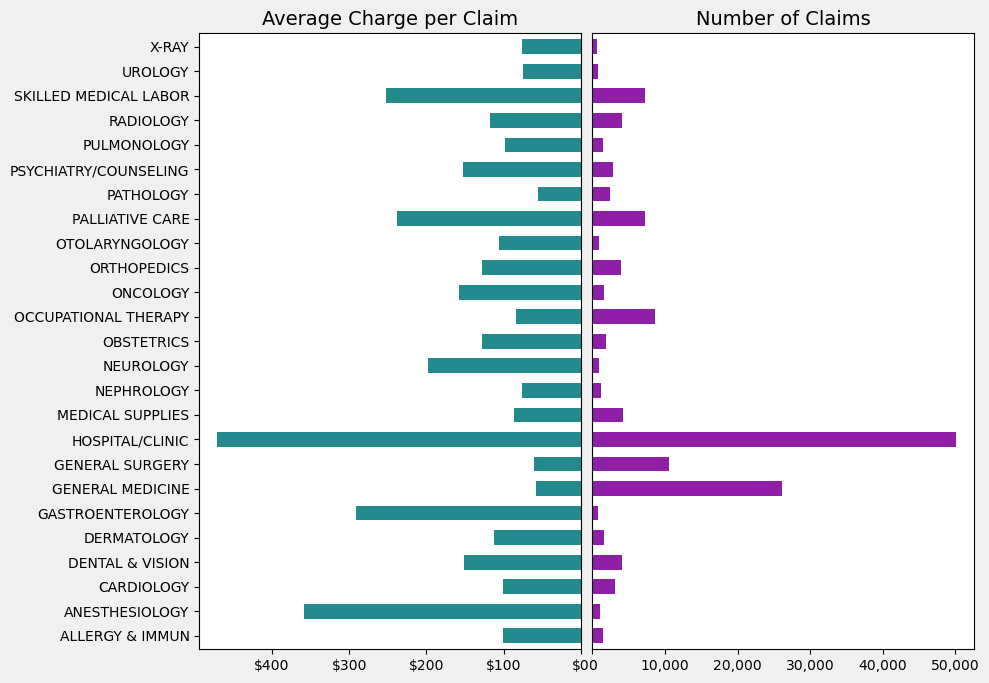

In [6]:


label = dfp_psc.Prov_Specialty_Desc.unique()

y1 = dfp_psc.groupby('Prov_Specialty_Desc')['Charge_Allowed'].mean()
y2 = dfp_psc.groupby('Prov_Specialty_Desc')['Charge_Allowed'].count()


formatter = '${x:,.0f}'
formatterc = '{x:,.0f}'
plt.style.use('seaborn-dark-palette')
width = 0.6

fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,8), facecolor=(.94, .94, .94), sharey=True)


ax.invert_xaxis()
# ax.invert_yaxis()
ax.yaxis.tick_left()
ax.yaxis.label.set_visible(False)

y1.plot(kind = 'barh', x=label, ax=ax, width=width, color='#238A8DFF')
y2.plot(kind = 'barh', x=label, ax=ax2, width=width, color='#8f1fa6')


ax.xaxis.set_major_formatter(formatter)
ax.set_title('Average Charge per Claim', fontsize=14)


ax2.xaxis.set_major_formatter(formatterc)
ax2.set_title('Number of Claims', fontsize=14)
ax2.tick_params(axis='y', labelleft=False, length=0)


plt.subplots_adjust(wspace=0.03)



# plt.tight_layout()
plt.show();

In [1]:
# https://sharkcoder.com/data-visualization/mpl-barh-chart

index = fig1_data.index

values = fig1_data['mean']
plot_title = 'Average Cost per Specialty'
title_size = 18
x_label = '$ Per Claim'


formatter = '${x:,.0f}'
formatterc = '{x:,.0f}'

# Subplots
fig, ax = plt.subplots(figsize=(10,7), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()


# Create bars

bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(formatter)
ax.invert_yaxis()

# Title Section

title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33,1])
plt.subplots_adjust(top=0.9, bottom=0.1)


# Gradient Background

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w,h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)

gradientbars(bar)


# Create bar labels

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height()/2
    space = -30
    ha = 'left'
    
    if x_value < 0:
        space *= -1
        ha = 'right'
        
    label = '${:,.0f}'.format(x_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords='offset points',
        va='center',
        ha=ha,
        fontsize=10,
        color='white')
    


# Set subtitles and labels

# tfrom = ax.get_xaxis_transform()
# ann = ax.annotate(subtitle, xy=(5,1), xycoords=tfrom,
#                   bbox=dict(boxstyle='square, pad=1.3', fc='#f0f0f0', ec='none'))


ax.set_xlabel(x_label, color='#525252')

# plt.savefig('DataFiles/GradChart.png', facecolor=(.4,.4,.4))







plt.show();

NameError: name 'fig1_data' is not defined

0    2788
1    2068
2    1845
3    1520
4    1514
5    1506
6    1405
7    1342
8    1274
9    1263
Name: Revenue, dtype: int64

In [76]:
psc_len = dfp_psc.Prov_Specialty_Desc.nunique()
psc_len = int(math.ceil(psc_len * .2))

psc_pie = dfp_psc.Prov_Specialty_Desc.value_counts().nlargest(6)\
    .to_frame().reset_index()\
    .rename(columns={'index':'Provider_Specialty','Prov_Specialty_Desc':'Num_Claims'})

psc_pie['Claim_Cum'] = psc_pie.Num_Claims.cumsum()
psc_pie['Percent_of_All_Claims'] = psc_pie.Claim_Cum / PCode_claims * 100
psc_pie


,Provider_Specialty,Num_Claims,Claim_Cum,Percent_of_All_Claims
0,HOSPITAL/CLINIC,50153,50153,33.73
1,GENERAL MEDICINE,26134,76287,51.30
2,GENERAL SURGERY,10497,86784,58.36
3,OCCUPATIONAL THERAPY,8684,95468,64.20
4,SKILLED MEDICAL LABOR,7235,102703,69.07
5,PALLIATIVE CARE,7209,109912,73.91


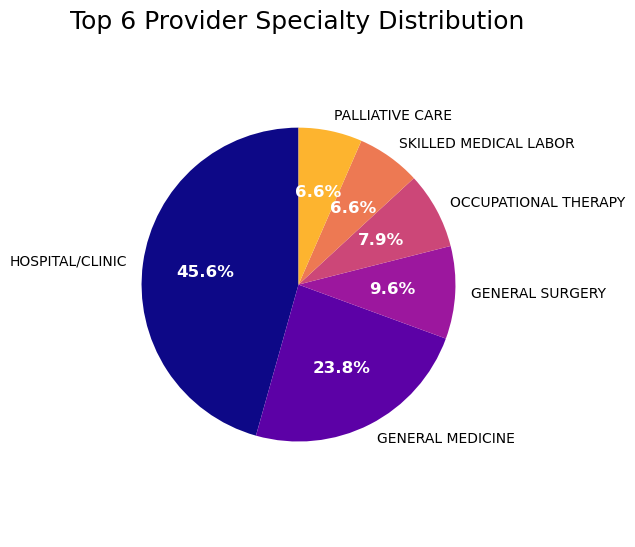

In [119]:
labels = psc_pie.Provider_Specialty
data = psc_pie.Num_Claims

fig1, ax1 = plt.subplots(figsize=(5,5))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('plasma')
ax1.set_prop_cycle('color', [theme(1. * i / len(data))
                            for i in range(len(data))])

_, _, autopcts = ax1.pie(data, startangle=90, radius=1800, autopct='%1.1f%%', labels=labels,
       textprops=dict(color='black'))

plt.setp(autopcts, **{'color': 'white', 'weight':'semibold', 'fontsize':12})

ax1.set_title("Top 6 Provider Specialty Distribution", fontdict={'fontsize':18})

ax1.axis('equal')

total = sum(data)

plt.show();


In [ ]:
psc_pvt2 = dfp.Prov_Specialty_Desc.value_counts().nlargest(10)

formatter = '{x:,.0f}' 
        
plt.style.use('seaborn-dark-palette')
psc_pvt2.plot(kind = 'barh')
plt.title('Top 10 Provider Specialty for Year')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Frequency')
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show();

#### Compare Top 3 Provider Categories to All

In [ ]:

psc_HOSP_CLINIC = dfp.Prov_Specialty_Desc == 'HOSPITAL/CLINIC'
psc_GEN_MEDICINE = dfp.Prov_Specialty_Desc == 'GENERAL MEDICINE'
psc_GEN_SURGERY = dfp.Prov_Specialty_Desc == 'GENERAL SURGERY'


fig, ax = plt.subplots()

width = .35
periods = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_spacing = 1

b1 = dfp.groupby('Pay_Period')['Prov_Specialty_Desc'].count()
l1 = dfp[psc_HOSP_CLINIC].groupby('Pay_Period')['Prov_Specialty_Desc'].count()
l2 = dfp[psc_GEN_MEDICINE].groupby('Pay_Period')['Prov_Specialty_Desc'].count()
l3 = dfp[psc_GEN_SURGERY].groupby('Pay_Period')['Prov_Specialty_Desc'].count()

ax.bar(periods, b1, label='ALL PROVIDERS', alpha=.5)
ax.plot(l1, label='HOSPITAL/CLINIC')
ax.plot(l2, label='GEN_MEDICINE')
ax.plot(l3, label='GEN_SURGERY')

plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Top 3 Provider Categories vs All', fontsize=18, weight = 'bold')
plt.ylabel('Count')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend()

plt.tight_layout()
plt.show();


#### Analyze Average Cost Per Claim by Provider Specialty

In [ ]:
aggregations1 = {
    'Prov_Specialty_Code':'count', 
    'Charge_Allowed':'sum'}

psc_pvt1 = dfp.groupby('Prov_Specialty_Desc')[['Prov_Specialty_Code','Charge_Allowed']] \
                        .agg(aggregations1)

psc_pvt1.rename(columns={'Prov_Specialty_Code':'Claim_Count'}, inplace=True)
psc_pvt1['Average_Claim_Cost'] = psc_pvt1.Charge_Allowed / psc_pvt1.Claim_Count
psc_pvt1 = psc_pvt1.sort_values(by=['Average_Claim_Cost'], ascending=False)
psc_pvt1 = psc_pvt1.drop('PHARMACEUTICAL')
psc_pvt1

In [ ]:
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(8,5))

plt.barh(psc_pvt1.index, psc_pvt1.Average_Claim_Cost)
plt.gca().invert_yaxis()

plt.title('Average Cost per Claim', fontsize=18, weight = 'bold')
plt.grid(axis = 'x')

plt.yticks(fontsize=8)

plt.tight_layout()

plt.show();

In [167]:

df.to_pickle('DataFiles/AnnualpickleMay12')
winsound.Beep(freq,duration)

In [170]:

df.loc[df['Charge_Trans'] == '508006']


,Mem_Acct,Mem_SubAcct,Mem_ID,Prov_ID,Prov_Specialty_Code,Prov_Specialty_Desc,Prov_Spec_Code_Num,Claim_ID,Claim_Line_Item,Claim_File_Date,Claim_POS,Claim_POS_Desc,Claim_Bill_Code,Claim_Bill_Desc,Claim_Bill_Proce,Claim_Bill_Proce_Desc,Claim_ICD1,Claim_ICD1.1,Claim_ICD_Desc,Charge,Charge_Allowed,Charge_CoPay,Charge_Deduct,Charge_CoIn,Charge_CMS,Charge_Other1,Charge_Other2,Charge_Other3,Charge_Paid,Charge_Trans,Charge_Trans_Date,Charge_Type,Pay_Period,Fiscal_Year
Index_Claim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [165]:
# df.drop(df[df.Charge_Trans == '508006'].index, inplace=True)
# df.drop(df[df.Prov_Specialty_Desc == 'PHARMACEUTICAL'].index, inplace=True)

In [163]:
df.describe()

,Prov_Spec_Code_Num,Claim_ID,Charge,Charge_Allowed,Charge_CoPay,Charge_Deduct,Charge_CoIn,Charge_CMS,Charge_Other1,Charge_Other2,Charge_Other3,Charge_Paid,Pay_Period,Fiscal_Year
count,"280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497","280,497"
mean,11,"9,167,014",395,133,4,5,4,26,0,1,0,92,5,"2,020"
std,5,"482,391","4,465","1,376",51,79,68,431,20,12,6,"1,272",3,0
min,1,"7,312,494","-384,480","-138,240","-2,843","-5,000","-6,417","-34,487",-436,-846,"-1,925","-137,828",1,"2,020"
25%,8,"8,774,880",22,0,0,0,0,0,0,0,0,0,2,"2,020"
50%,9,"9,060,801",99,17,0,0,0,0,0,0,0,3,4,"2,020"
75%,13,"9,499,365",205,92,0,0,0,0,0,0,0,59,6,"2,020"
max,26,"10,357,410","711,169","291,864","3,653","5,000","6,417","77,926","4,097","1,090","1,365","291,864",12,"2,020"


In [282]:
df.groupby('Charge_Trans')['Charge_Allowed'].sum()

Charge_Trans
               261598
45152             430
45153            1500
45154            2003
45155            1220
                ...  
WRO00294129       217
WRO00294132      1397
WRO00294139       100
WRO00294140      1332
WRO00294141       278
Name: Charge_Allowed, Length: 21423, dtype: int32